# Lasso Regression

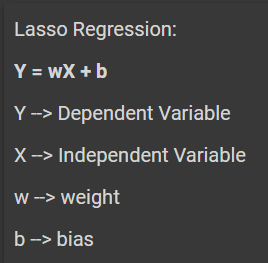

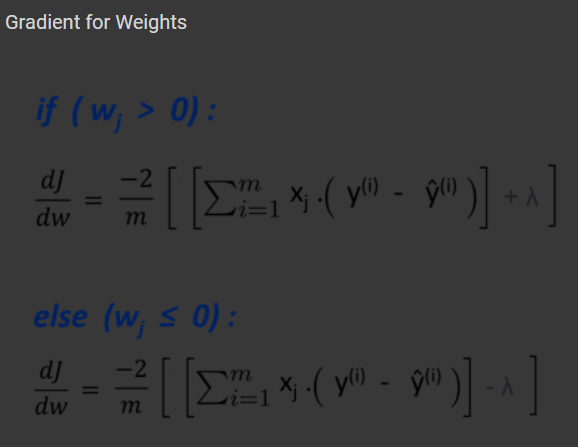

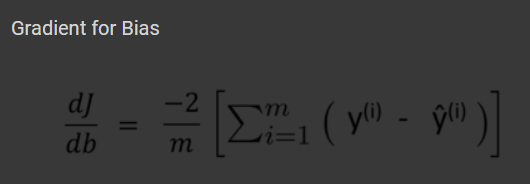

In [16]:
import numpy as np

In [17]:
class Lasso_Regression():
    
    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
        
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter
        
    
    def fit(self, X, Y):
        
        # m --> number of Data points --> number of rows
        # n --> number of input features --> number of columns
        self.m, self.n = X.shape

        self.w = np.zeros(self.n)

        self.b = 0

        self.X = X

        self.Y = Y
    
        # implementing Gradient Descent algorithm for Optimization
        for i in range(self.no_of_iterations):
            self.update_weights()
    
    
    def update_weights(self):
        
        Y_prediction = self.predict(self.X)
        
        # gradient for weight
        dw = np.zeros(self.n)
        
        for i in range(self.n):
            
            if self.w[i] > 0:
                dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m 

            else:
                dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m

        # gradient for bias
        db = - 2 * np.sum(self.Y - Y_prediction) / self.m
        
        
        # updating the weights & bias
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db
        
    
    def predict(self, X):
        return X.dot(self.w) + self.b
        

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

In [19]:
salary_data = pd.read_csv('salary_data.csv')
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [20]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [21]:
salary_data.shape

(30, 2)

In [22]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [23]:
features = salary_data.iloc[:,:-1].values      
target = salary_data.iloc[:,1].values

In [24]:
print(features)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [25]:
print(target)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, 
                                                    test_size=0.33, 
                                                    random_state = 2)

In [27]:
model = Lasso_Regression(learning_rate = 0.02, no_of_iterations=1000,
                         lambda_parameter=200)

In [28]:
model.fit(X_train, Y_train)

In [29]:
test_data_prediction = model.predict(X_test)

In [30]:
print(test_data_prediction)

[ 36068.90441536  34166.14804787  66513.00629512  58901.98082518
  91248.83907243  80783.67905126 101713.9990936   52242.33353898
  42728.55170156  88394.7045212 ]


In [35]:
# R squared error

score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared Error: ", score_1)
print("Mean Absolute Error: ", score_2)

R squared Error:  0.9041366551714738
Mean Absolute Error:  6675.382767802961


<b> Comparing the error with SKLearn Lasso Regression

In [32]:
from sklearn.linear_model import Lasso
sk_model = Lasso()

In [33]:
sk_model.fit(X_train, Y_train)

Lasso()

In [34]:
sk_test_data_prediction = sk_model.predict(X_test)

In [36]:
# R squared error
score_1_ = metrics.r2_score(Y_test, sk_test_data_prediction)

# Mean Absolute Error
score_2_ = metrics.mean_absolute_error(Y_test, sk_test_data_prediction)

print("R squared error : ", score_1_)
print('Mean Absolute Error : ', score_2_)

R squared error :  0.9041817142395876
Mean Absolute Error :  6673.480440148536
